Generate fake data

In [1]:
import os
from tqdm import tqdm
import pandas as pd
from datasets import load_dataset


/Users/user/mambaforge/envs/zoobot39_dev/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

save_dir = '/Users/user/repos/zoobot/examples/finetuning/tmp/metadata/imgs'


In [3]:

# load both splits
im_ds_dict = load_dataset("mwalmsley/is-lsb")

for split in ['train', 'test']:
    # convert split to pandas DataFrame
    im_ds = im_ds_dict[split]
    df: pd.DataFrame = im_ds.with_format("pandas")[:]

    df['file_loc'] = df['id_str'].apply(lambda id_str: f'{save_dir}/images/{split}/{id_str}.jpg')

    # save dataset metadata as CSV
    df.to_csv(f'{save_dir}/{split}_dataset.csv', index=False)

    # make image directory
    os.makedirs(f'{save_dir}/images/{split}', exist_ok=True)

    # save each image
    for _, row in tqdm(df.iterrows(), total=len(df)):
        id_str = row['id_str']
        img = row['image']  # already PIL.Image.Image
        img.save(row['file_loc'])

100%|██████████| 863/863 [00:03<00:00, 279.54it/s]


In [4]:
df_train = pd.read_csv('imgs/train_dataset.csv')
df_test = pd.read_csv('imgs/test_dataset.csv')

df_train= df_train.reset_index(drop=True) 
df_test=df_test.reset_index(drop=True) 

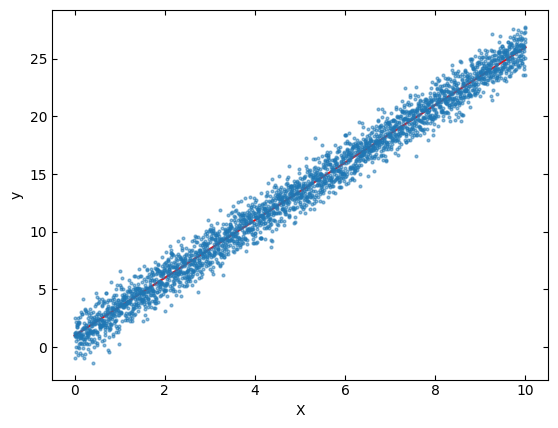

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(14) 

n = (2014+864)   
slope = 2.5     
b = 1.0    
noise_std = 1.0    

X = np.linspace(0, 10, n)
noise = np.random.normal(0, noise_std, n)
y = slope * X + b + noise


df = pd.DataFrame({'X': X, 'y':y})

fig, ax = plt.subplots()
ax.scatter(df['X'], df['y'], label="Data with noise", s=4, alpha=0.5)
ax.plot(df['X'], slope*df['X'] + b, color="red", label="True line", zorder=0)
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.tick_params(direction='in')
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

Add pair images to the fake data

In [6]:
from sklearn.model_selection import train_test_split
train_, test_ = train_test_split(df, test_size=864, train_size=2014, random_state=14)

In [7]:
train_

,X,y
1138,3.955509,9.051425
2656,9.231839,23.476162
437,1.518943,2.276750
2859,9.937435,25.216443
1617,5.620438,16.640429
...,...,...
2375,8.255127,21.467994
2454,8.529718,22.153967
1292,4.490789,11.934551
1368,4.754953,13.285819


In [8]:
train_=train_.reset_index(drop=True) 
test_ = test_.reset_index(drop=True) 

In [9]:
df_train[['X', 'y']] = train_[['X', 'y']]
df_test[['X', 'y']] = test_[['X', 'y']]

In [10]:
df_train.to_csv('imgs/train_dataset.csv', index=False)
df_test.to_csv('imgs/test_dataset.csv', index=False)